In [21]:
import os
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [25]:
project_path = r'D:\UCBerkeley\CourseWork\202001\W251\Homework\Project'
dir_train = r'openpose_output\image_transfer_hand4_less_DRESS_old'
test_img = r'CHEAP\mask_CHEAP_c1_train.png'

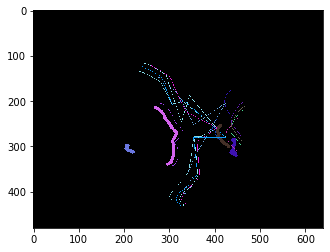

In [26]:
test_image = os.path.join(project_path, dir_train, test_img)
color_img = cv2.imread(os.path.join(project_path, dir_train, test_image))
plt.imshow(color_img)
color_img_arr = np.array(color_img)


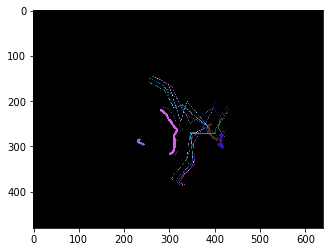

In [27]:
# Reference: https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/image/affine_transformations.py
# tx: Width shift.
# ty: Heigh shift.
# shear: Shear angle in degrees.
# zx: Zoom in x direction.
# zy: Zoom in y direction
test_ig = ImageDataGenerator()
new_image = test_ig.apply_transform(color_img_arr, transform_parameters={'zx':1.3, 'zy':1.3})
out_image = Image.fromarray(new_image)
plt.imshow(out_image)

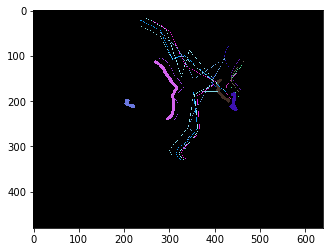

In [28]:
test_ig = ImageDataGenerator()
new_image = test_ig.apply_transform(color_img_arr, transform_parameters={'tx': 100})
out_image = Image.fromarray(new_image)
plt.imshow(out_image)



In [46]:
from scipy.stats import multivariate_normal

In [140]:
# The selection is var_arr is judgemental
#   The goal is to get a good spread of prob_center_lst
var_arr = np.concatenate([np.arange(0.01, 0.1, 0.01), np.round(np.exp(np.arange(0.1, 3, 0.2))-1, 1)])
prob_center_lst = []
for var in var_arr:
    prob_corner = multivariate_normal.cdf([0.5,-0.5], mean=[0,0], cov=[[var,0],[0,var]])
    prob_center = 1 - prob_corner*4
    prob_center_lst.append(prob_center)

In [141]:
print(prob_center_lst[:10])
print(prob_center_lst[-10:])

[0.9999988533940412, 0.9991862615750546, 0.9922303166655003, 0.9753155784707281, 0.9499478492092006, 0.9192459851126827, 0.8858918480547813, 0.8517446467357871, 0.8179742619901802, 0.7852683835565047]
[0.07635627390340871, 0.0571655931579339, 0.04440796480934184, 0.03472121082183888, 0.027517848850387328, 0.02185106965337713, 0.017521198796272452, 0.014105080087145838, 0.011381637976252468, 0.009208514637121246]


In [142]:
prob_center_arr = np.array(prob_center_lst)
est_var = var_arr[np.argmin(abs(prob_center_arr-0.5))]
est_var

0.3

In [147]:
move_x = 5
move_y = 0
est_var = 20

move_x_neg = -abs(move_x)
move_y_neg = -abs(move_y)

est_prob = multivariate_normal.cdf([move_x_neg+0.5,move_y_neg+0.5], mean=[0,0], cov=[[est_var,0],[0,est_var]]) \
           - multivariate_normal.cdf([move_x_neg+0.5,move_y_neg-0.5], mean=[0,0], cov=[[est_var,0],[0,est_var]]) \
           - multivariate_normal.cdf([move_x_neg-0.5,move_y_neg+0.5], mean=[0,0], cov=[[est_var,0],[0,est_var]]) \
           + multivariate_normal.cdf([move_x_neg-0.5,move_y_neg-0.5], mean=[0,0], cov=[[est_var,0],[0,est_var]])
est_prob

0.004252815455031464

In [149]:
est_var = 1
move_x_range = np.arange(-5, 6)
move_y_range = np.arange(-5, 6)
u = np.random.uniform(0, 1)
print(u)
prob_corner = multivariate_normal.cdf([0.5,-0.5], mean=[0,0], cov=[[est_var,0],[0,est_var]])
prob_center = 1 - prob_corner*4
if u > prob_center:
    print('We are moving!')
    while True:
        try_move_x = int(np.random.choice(move_x_range, 1))
        try_move_y = int(np.random.choice(move_y_range, 1))
        try_move_x_neg = -abs(try_move_x)
        try_move_y_neg = -abs(try_move_x)
        
        est_prob = multivariate_normal.cdf([try_move_x_neg+0.5,try_move_y_neg+0.5], mean=[0,0], cov=[[est_var,0],[0,est_var]]) \
                   - multivariate_normal.cdf([try_move_x_neg+0.5,try_move_y_neg-0.5], mean=[0,0], cov=[[est_var,0],[0,est_var]]) \
                   - multivariate_normal.cdf([try_move_x_neg-0.5,try_move_y_neg+0.5], mean=[0,0], cov=[[est_var,0],[0,est_var]]) \
                   + multivariate_normal.cdf([try_move_x_neg-0.5,try_move_y_neg-0.5], mean=[0,0], cov=[[est_var,0],[0,est_var]])
        u = np.random.uniform(0, 1)
        if u < est_prob:
            sim_move_x = try_move_x
            sim_move_y = try_move_y
            break

0.5877591838214065
We are moving!


In [150]:
print(sim_move_x)
print(sim_move_y)


-1
4
